<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/Project_Based_Learning_kelompok_3_cs03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git

fatal: destination path 'bitlabs-project' already exists and is not an empty directory.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from tabulate import tabulate
import pandas as pd


In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_request.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv')



In [ ]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,UNKNOWN,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,UNKNOWN,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,UNKNOWN,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,UNKNOWN,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,UNKNOWN,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498


In [ ]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [ ]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,492c51e6c6a4392b2758d93961bee0a778b42151644ebc...,VISAPPRNC,PAPERVISA - Non Corporate,16344.00
1,35f36305f75d6878d2faef1d65872b3110d2cc67308839...,VISAPPRSCNC,VISAPAPER Supply-Chain Non Corporate,14375.00
2,35f36305f75d6878d2faef1d65872b3110d2cc67308839...,VISAPPRSCNC,VISAPAPER Supply-Chain Non Corporate,75816.25
3,877cbc48ac832c9f872a12d06d949376f0d918ad48868d...,PPRMAYN2,Promo Loyalty Mei 2,450000.00
4,0a77054fc75a9d6dbb33ae4be6e3420e557715ef8c3a2a...,PPRMARF1,MERIAH-1,499800.00


In [ ]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58


**Missing Values**



DF1

In [ ]:
# Mengganti nilai NaN di semua kolom df1 dengan 'unknown'
df1.fillna('unknown', inplace=True)

# Memeriksa hasil akhir dan menampilkan dalam format tabel menggunakan tabulate
print("DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':")
print(tabulate(df1.head(), headers='keys', tablefmt='psql'))

df_cleaned = df1[df1['dpt_promotion_id'] != 'unknown']

#Menyimpan DataFrame yang telah dibersihkan ke dataset baru
df_cleaned.to_csv('cleaned_dataset.csv', index=False)  # Simpan sebagai file CSV



DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':
+----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+------------------------------------------------------------------+----------------------+--------------------------+-------------------------+--------------------------------+--------------------------------+
|    | dpt_id                                                           | dpt_promotion_id   | buyer_id                                                         | seller_id                                                        |   transaction_amount | payment_method_name      | payment_provider_name   | transaction_created_datetime   | transaction_updated_datetime   |
|----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+-------------------------------------

df3

In [ ]:

# Mengganti nilai NaN di kolom dpt_promotion_id, promotion_code, dan promotion_name dengan 'unknown'
df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']] = df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].fillna('unknown')

# Memeriksa hasil penggantian NaN
print("DataFrame df3 setelah mengganti NaN dengan 'unknown':")
print(tabulate(df3.head(), headers='keys', tablefmt='psql'))

# Menghapus baris dengan nilai 'unknown' pada kolom yang disebutkan
df3 = df3[~df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].isin(['unknown']).any(axis=1)]

# Menghapus baris dengan nilai 0.0 pada kolom transaction_promo_cashback_amount
df3 = df3[df3['transaction_promo_cashback_amount'] != 0.0]

# Memeriksa hasil akhir dan menampilkan dalam format tabel menggunakan tabulate
print("DataFrame df3 setelah menghapus nilai 'unknown' dan 0.0:")
print(tabulate(df3.head(), headers='keys', tablefmt='psql'))

df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']] = df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].fillna('unknown')


# Menyimpan DataFrame ke file CSV yang sudah ada di Google Drive, tanpa menambahkan file CSV yang baru
df3.to_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv', index=False)


DataFrame df3 setelah mengganti NaN dengan 'unknown':
+----+------------------------------------------------------------------+------------------+--------------------------------------+-------------------------------------+
|    | dpt_promotion_id                                                 | promotion_code   | promotion_name                       |   transaction_promo_cashback_amount |
|----+------------------------------------------------------------------+------------------+--------------------------------------+-------------------------------------|
|  0 | 492c51e6c6a4392b2758d93961bee0a778b42151644ebc4581847935d4a56119 | VISAPPRNC        | PAPERVISA - Non Corporate            |                             16344   |
|  1 | 35f36305f75d6878d2faef1d65872b3110d2cc67308839088d56575589bdc4cf | VISAPPRSCNC      | VISAPAPER Supply-Chain Non Corporate |                             14375   |
|  2 | 35f36305f75d6878d2faef1d65872b3110d2cc67308839088d56575589bdc4cf | VISAPPRSCNC      | VIS

df4

In [ ]:

# Mengidentifikasi nilai yang hilang (NaN) dalam kolom penting
missing_data = df4[['user_fraud_flag', 'blacklist_account_flag']].isna().sum()

# Mengidentifikasi baris yang memiliki nilai NaN dalam kolom penting
rows_with_missing_data = df4[df4[['user_fraud_flag', 'blacklist_account_flag']].isna().any(axis=1)]

# Mengidentifikasi ketidaksesuaian dalam kolom penting
# Misalnya, jika user_fraud_flag = 1 maka blacklist_account_flag harus = 1
inconsistencies = df4[(df4['user_fraud_flag'] == 1) & (df4['blacklist_account_flag'] != 1)]

# Menampilkan hasil dalam format tabel menggunakan tabulate
print("Missing Data in Key Fraud-Related Columns:")
print(tabulate(rows_with_missing_data, headers='keys', tablefmt='psql'))

print("\nInconsistencies in Key Fraud-Related Columns:")
print(tabulate(inconsistencies, headers='keys', tablefmt='psql'))


Output streaming akan dipotong hingga 5000 baris terakhir.
| 18052 | d6b762509e106d03205b7df124133b6a509b0741d5e801561c6e96fb3a9f6a94 | AKUN_DIBEKUKAN            | BELUM_VALIDASI            | PERORANGAN           |                             1 |                             1 |                 1 |                      0 |                        0 | FREE                            | 2023-03-20 05:10:11           |
| 18057 | e6ddcb118d4568a7f35ae671091c40ff53a968a1447fa7f60f1749f05a52d57c | AKUN_DIBEKUKAN            | DOKUMEN_KURANG_LENGKAP    | PERORANGAN           |                             1 |                             1 |                 1 |                      0 |                        0 | FREE                            | 2022-12-12 17:03:37           |
| 18059 | 43e640d9367c005f993d3b40c5504799c1b2e25f0ad1747917f1ddffca5c5fcf | AKUN_DIBEKUKAN            | VALIDASI_BERHASIL         | PERORANGAN           |                             1 |                             1 |      

future enggenering

Buyer-Seller Relationship Score

In [ ]:
# 1. Menghitung frekuensi interaksi dan volume transaksi
interaction_counts = df1.groupby(['buyer_id', 'seller_id']).size().reset_index(name='transaction_count')
interaction_volumes = df1.groupby(['buyer_id', 'seller_id'])['transaction_amount'].sum().reset_index(name='total_volume')

# 2. Menggabungkan frekuensi dan volume transaksi
interaction_summary = pd.merge(interaction_counts, interaction_volumes, on=['buyer_id', 'seller_id'])

# 3. Normalisasi ke persentase
interaction_summary['transaction_count_percent'] = 100 * interaction_summary['transaction_count'] / interaction_summary['transaction_count'].max()
interaction_summary['total_volume_percent'] = 100 * interaction_summary['total_volume'] / interaction_summary['total_volume'].max()

# 4. Menghitung Relationship Score dalam persentase
interaction_summary['relationship_score'] = (interaction_summary['transaction_count_percent'] + interaction_summary['total_volume_percent']) / 2

# 5. Menggunakan DBSCAN untuk deteksi anomali
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2, min_samples=5)
interaction_summary['anomaly'] = model.fit_predict(interaction_summary[['relationship_score']])

# 6. Mengubah label anomali ke 1 (anomali) dan 0 (bukan anomali)
interaction_summary['anomaly'] = interaction_summary['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# 7. Menyaring anomali (label 1 berarti anomali)
anomalies = interaction_summary[interaction_summary['anomaly'] == 1]

# 8. Menampilkan 5 baris teratas dari ringkasan dan anomali
from tabulate import tabulate
print("Summary of Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(interaction_summary[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score', 'anomaly']].head(), headers='keys', tablefmt='psql'))

print("\nAnomalies in Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(anomalies[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score']].head(), headers='keys', tablefmt='psql'))

df1.to_csv('Buyer-Seller Relationship Score.csv', index=False)

Summary of Buyer-Seller Relationships (Top 5 Rows):
+----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------+
|    | buyer_id                                                         | seller_id                                                        |   transaction_count_percent |   total_volume_percent |   relationship_score |   anomaly |
|----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------|
|  0 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 |                   0.157978  |            0.00124999  |            0.0796139 |         0 |
|  1 | 001046b5061e28476

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from tabulate import tabulate

#revisi kode dan ganti dbscan nya

# Reset index to make 'transaction_created_datetime' a column again
df1 = df1.reset_index()

# Mengubah kolom transaction_created_datetime menjadi tipe datetime
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])

# Atur index pada kolom transaction_created_datetime untuk analisis time series
# df1.set_index('transaction_created_datetime', inplace=True) # This line is not needed and caused the confusion

# Hitung frekuensi transaksi harian, menambahkan buyer_id untuk setiap transaksi
daily_transactions = df1.groupby([df1['transaction_created_datetime'].dt.date, 'buyer_id']).size().reset_index(name='transaction_count')
# Rename the date column directly in the groupby for clarity
daily_transactions.rename(columns={'transaction_created_datetime': 'transaction_date'}, inplace=True)

# Mengidentifikasi lonjakan aktivitas (bursts) dan jeda yang tidak biasa (gaps) menggunakan DBSCAN
# Menyiapkan data untuk DBSCAN
daily_transactions['day_of_year'] = pd.to_datetime(daily_transactions['transaction_date']).dt.dayofyear # Use the correct column name here
X = daily_transactions[['day_of_year', 'transaction_count']]

# Menerapkan DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(X)
daily_transactions['anomaly'] = db.labels_

# Menyaring transaksi yang merupakan anomali (label = -1)
anomalies = daily_transactions[daily_transactions['anomaly'] == -1]

# Mengelompokkan anomali berdasarkan hari untuk menemukan bursts atau gaps
anomaly_summary = anomalies.groupby(anomalies['transaction_date']).size().reset_index(name='anomaly_count') # Use the correct column name here

# Tampilkan hasil anomali dalam format tabel menggunakan tabulate
print("Anomalies in Transaction Frequency with Buyer ID:")
print(tabulate(anomalies, headers='keys', tablefmt='psql'))

print("\nDaily Summary of Anomalies (Bursts or Gaps):")
print(tabulate(anomaly_summary, headers='keys', tablefmt='psql'))

Anomalies in Transaction Frequency with Buyer ID:
+-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------+
|       | transaction_date   | buyer_id                                                         |   transaction_count |   day_of_year |   anomaly |
|-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------|
|   951 | 2023-01-24         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            24 |        -1 |
|  1009 | 2023-01-25         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            25 |        -1 |
|  1099 | 2023-01-27         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                   8 |            27 |        -1 |
|  1158 | 2023-01-28         | 0bb440f2ae8461ca7b424f9b0efddbb

In [ ]:
buyer_promo_usage = (
    df1.loc[df1['dpt_promotion_id'].notna() &
            (df1['dpt_promotion_id'] != '') &
            (df1['dpt_promotion_id'] != 'unknown')]
    .assign(buyer_promo_pair=lambda x: x['buyer_id'].astype(str) + ' - ' + x['dpt_promotion_id'])
    .groupby('buyer_promo_pair')
    .size()
    .reset_index(name='usage_count')
)

buyer_promo_usage


,buyer_promo_pair,usage_count
0,0026eba831da3b7127429ffef8fcef0f96b547f5c7fab0...,1
1,002ead1395e772dedbb47368fcbe317e14987e5f991221...,1
2,002ead1395e772dedbb47368fcbe317e14987e5f991221...,1
3,002ead1395e772dedbb47368fcbe317e14987e5f991221...,2
4,0104836daa6e1e44af47e550530b445a46ff5f21dc3464...,1
...,...,...
869,ff6660f9715659549d6e2f67c3816258f487865b255b81...,1
870,ffa585acc35ab320a44e0b6f22de0f8225058fa21b18d7...,1
871,ffbd0dca96a261f771d67e40d9d5be546a5180b1043a7a...,1
872,ffd999c933c180fad23caeaf5336da950553b5f4f0b6e3...,1


scaling dan normaliisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Pastikan kolom datetime sudah dalam format datetime
df1[['transaction_created_datetime', 'transaction_updated_datetime']] = df1[['transaction_created_datetime', 'transaction_updated_datetime']].apply(pd.to_datetime)

# Hitung selisih waktu dalam detik
df1['time_difference'] = (df1['transaction_updated_datetime'] - df1['transaction_created_datetime']).dt.total_seconds()

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Terapkan RobustScaler pada transaction_amount dan time_difference
df1[['scaled_transaction_amount', 'scaled_time_difference']] = pd.DataFrame(scaler.fit_transform(df1[['transaction_amount', 'time_difference']]), index=df1.index)

# Tampilkan beberapa baris hasil
print(df1.head())

                                              dpt_id dpt_promotion_id  \
0  69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...          unknown   
1  961d6f7efde3622da8f35e76e2b53acd84c647a661de86...          unknown   
2  6441defc089b4ae947cce529904a5c7db2326ede52bdaa...          unknown   
3  64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...          unknown   
4  ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...          unknown   

                                            buyer_id  \
0  bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...   
1  09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...   
2  25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...   
3  5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...   
4  5c19a13a9b229340b584f621b648f4dec7491e12368392...   

                                           seller_id  transaction_amount  \
0  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             20380.0   
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             14673.6

EDA

Statistik Deskriptif:
count    5.000000e+04
mean     1.965125e+07
std      1.057004e+08
min      0.000000e+00
25%      7.000043e+04
50%      1.850172e+06
75%      1.398597e+07
max      2.014010e+10
Name: transaction_amount, dtype: float64


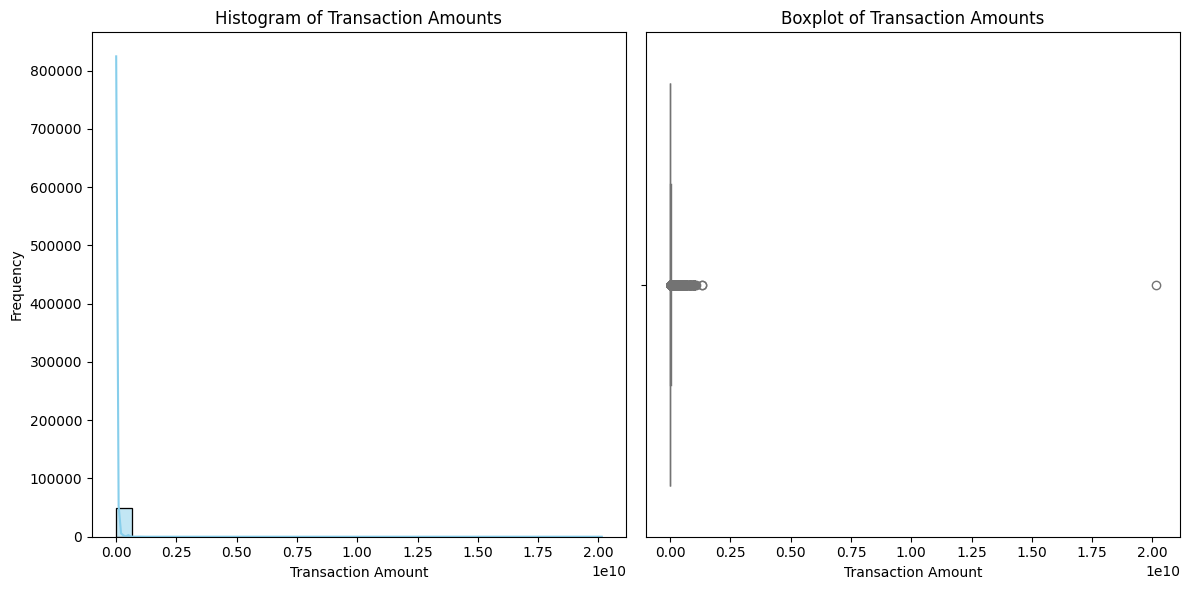

Jumlah Outlier: 6777
Outliers:
                                                  dpt_id dpt_promotion_id  \
12     3994ae53eabf3ffe2d20340a45f3c75b99c8458815bc1c...          unknown   
14     a6dcc743fe284523416b67914fe1c5b11bb26e70999b92...          unknown   
17     2d2378e0f0a8786dccf6fc23e1ec68a68b5d2d818dc2cc...          unknown   
22     890aa93fbe0e0edce8ab0bbe3d9fe06d684336991b2652...          unknown   
31     8f110fe98176434656c2867d9249317973607c14fc9157...          unknown   
...                                                  ...              ...   
49980  e992be221ac3417bb5cb3c7169112805292f5d69b45215...          unknown   
49982  6dba1500d1c41d22fdc1f338aa672c3d6c10043c024ea1...          unknown   
49985  64df847059e06e478a733fcedeed863c182bc59e9c2b86...          unknown   
49986  29a29c95e84286265071f62f084731f844644d19ae3f4f...          unknown   
49996  0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...          unknown   

                                            

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Analisis statistik dasar
print("Statistik Deskriptif:")
print(df1['transaction_amount'].describe())

# Visualisasi distribusi
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df1['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['transaction_amount'], color='lightgreen')
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Transaction Amount")

plt.tight_layout()
plt.show()

# Identifikasi outlier menggunakan IQR
Q1 = df1['transaction_amount'].quantile(0.25)
Q3 = df1['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['transaction_amount'] < lower_bound) | (df1['transaction_amount'] > upper_bound)]
print(f"Jumlah Outlier: {len(outliers)}")

# Display outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)


Top 10 Buyer-Seller Pairs:
                                   buyer_seller_pair  frequency
0  0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...       1266
1  10f3200ad77826457a7b33726d1ec95de21ee6400745aa...        321
2  34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...        294
3  b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...        294
4  9506dece8982a8d50fbb2924dd510825ea1516c19852aa...        261
5  2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...        248
6  df43724682fbd651e549d3e2043a9d0d2cc4700545863a...        243
7  02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...        216
8  df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...        215
9  0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...        210


<ipython-input-8-f3cc68e01070>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


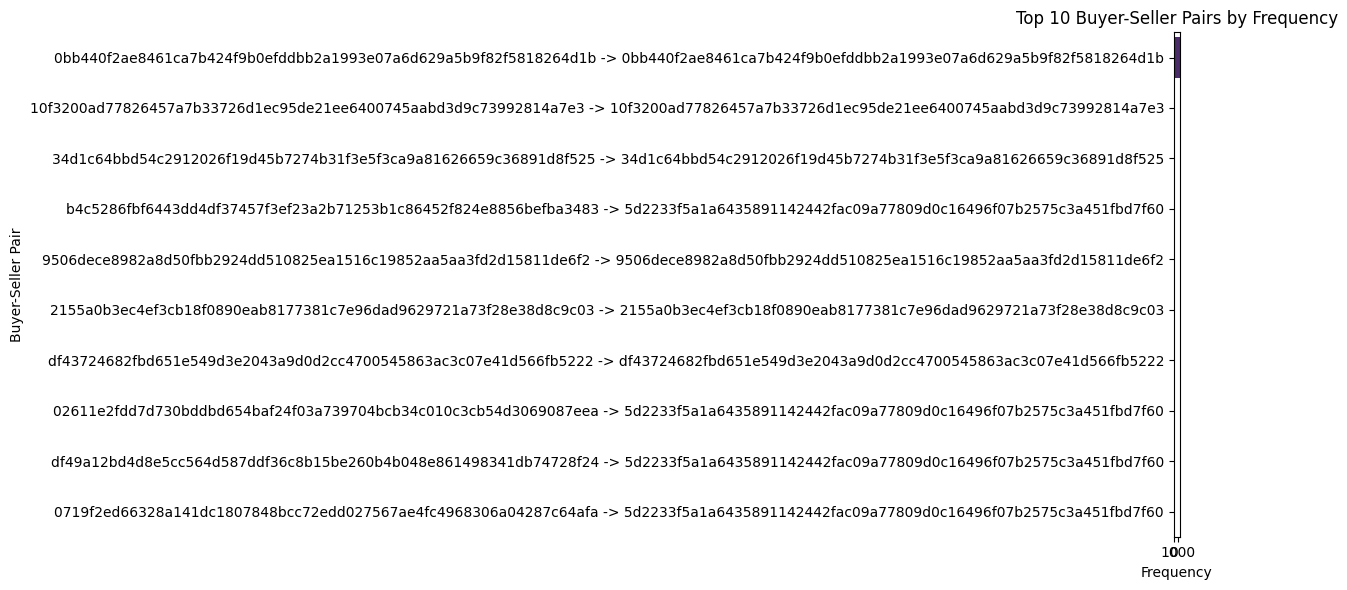

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Menggabungkan buyer_id dan seller_id menjadi pasangan unik
df1['buyer_seller_pair'] = df1['buyer_id'].astype(str) + ' -> ' + df1['seller_id'].astype(str)

# Menghitung frekuensi setiap pasangan
pair_frequencies = df1['buyer_seller_pair'].value_counts().reset_index()
pair_frequencies.columns = ['buyer_seller_pair', 'frequency']

# Menampilkan pasangan dengan frekuensi tertinggi
print("Top 10 Buyer-Seller Pairs:")
print(pair_frequencies.head(10))

# Visualisasi pasangan dengan frekuensi tertinggi
top_n = 10  # Jumlah pasangan teratas yang akan divisualisasikan
top_pairs = pair_frequencies.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='frequency',
    y='buyer_seller_pair',
    data=top_pairs,
    palette='viridis'
)
plt.title(f"Top {top_n} Buyer-Seller Pairs by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Buyer-Seller Pair")
plt.tight_layout()
plt.show()


Top 10 Promotions by Usage (Based on Promotion IDs):
          promotion_id  usage_count
0              unknown        49063
1  promotion-219036467          243
2  promotion-214984720           88
3  promotion-188676794           69
4  promotion-674366813           39
5  promotion-296267691           37
6  promotion-489458741           36
7  promotion-372044798           36
8  promotion-198050007           28
9  promotion-140639091           27


<ipython-input-10-f7d215b374e4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


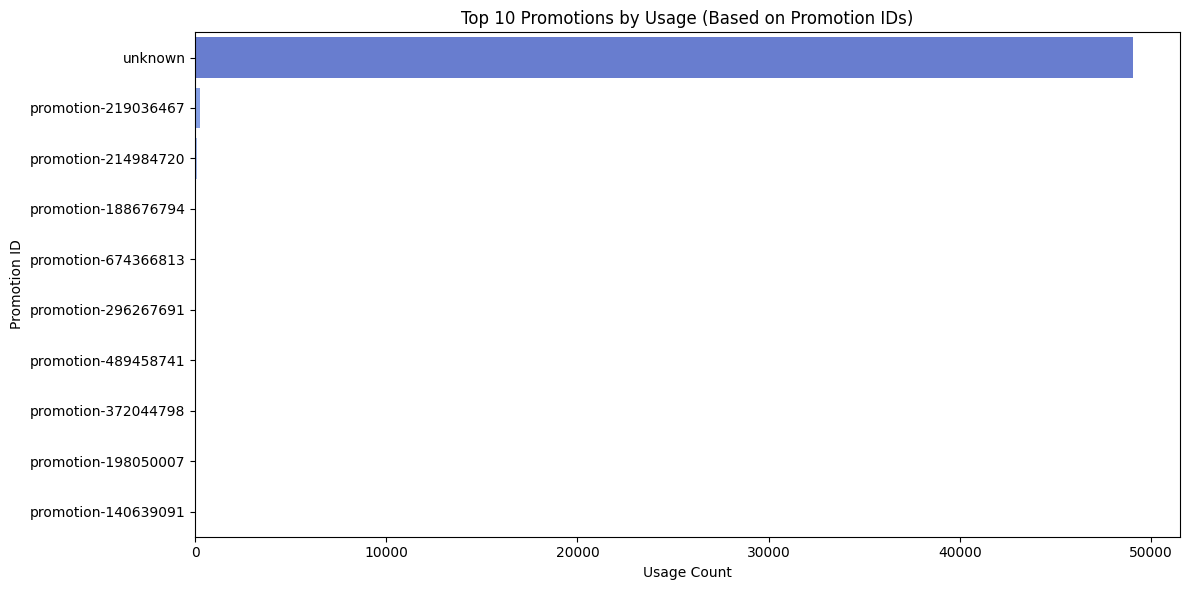

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file_transactions.csv')

# Menghitung jumlah penggunaan tiap promosi
promotion_usage = df1['dpt_promotion_id'].value_counts().reset_index()
promotion_usage.columns = ['promotion_id', 'usage_count']

# Menampilkan 10 promosi teratas berdasarkan penggunaan
print("Top 10 Promotions by Usage (Based on Promotion IDs):")
print(promotion_usage.head(10))

# Visualisasi promosi dengan penggunaan terbanyak
top_n = 10  # Jumlah promosi teratas yang akan divisualisasikan
top_promotions = promotion_usage.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='usage_count',
    y='promotion_id',
    data=top_promotions,
    palette='coolwarm'
)
plt.title(f"Top {top_n} Promotions by Usage (Based on Promotion IDs)")
plt.xlabel("Usage Count")
plt.ylabel("Promotion ID")
plt.tight_layout()
plt.show()


Top 10 Repeated Transactions:
                                   buyer_seller_pair  transaction_count
0  0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...               1266
1  10f3200ad77826457a7b33726d1ec95de21ee6400745aa...                321
2  34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...                294
3  b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...                294
4  9506dece8982a8d50fbb2924dd510825ea1516c19852aa...                261
5  2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...                248
6  df43724682fbd651e549d3e2043a9d0d2cc4700545863a...                243
7  02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...                216
8  df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...                215
9  0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...                210


<ipython-input-11-b4d4a04c4e1b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


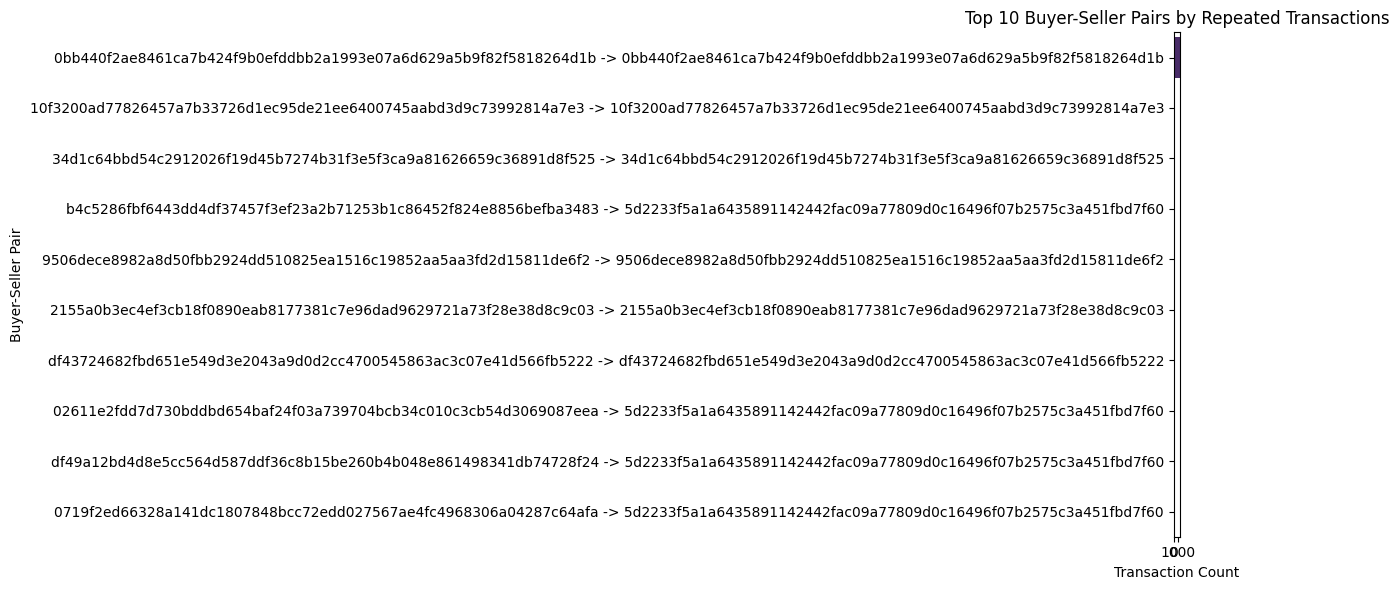


Descriptive Statistics for Transaction Amounts:
count    5.000000e+04
mean     1.965125e+07
std      1.057004e+08
min      0.000000e+00
25%      7.000043e+04
50%      1.850172e+06
75%      1.398597e+07
max      2.014010e+10
Name: transaction_amount, dtype: float64

Number of Abnormally High Transactions: 6777

Abnormally High Transactions:
    transaction_amount                                           buyer_id  \
12        9.999939e+07  4e748c692460aa2d2f08354ea0ef0b2146addf170d4c6a...   
14        8.470973e+08  ffcb909cf0b66998e1f034d00ed93b65350b1defddd6e2...   
17        1.015500e+08  ecad68c6f8f865f785578f9be9fde7916f2f598858c28d...   
22        2.500000e+08  b958f0abcc3036f39ef281236179d70aa1f6e44c9775cf...   
31        5.216400e+07  19fb72a33fb7d746ea5049eb55a7399479614bd8eb4eaf...   
34        9.739200e+07  1cd7c6221d8919d6b0113eb17ab64ec31442189a6e635a...   
36        2.089885e+08  a19057a27b5d3caa27312d3636a207a7a67bbf0e3b66cb...   
47        9.951900e+07  e79b75b9a9d195ee7

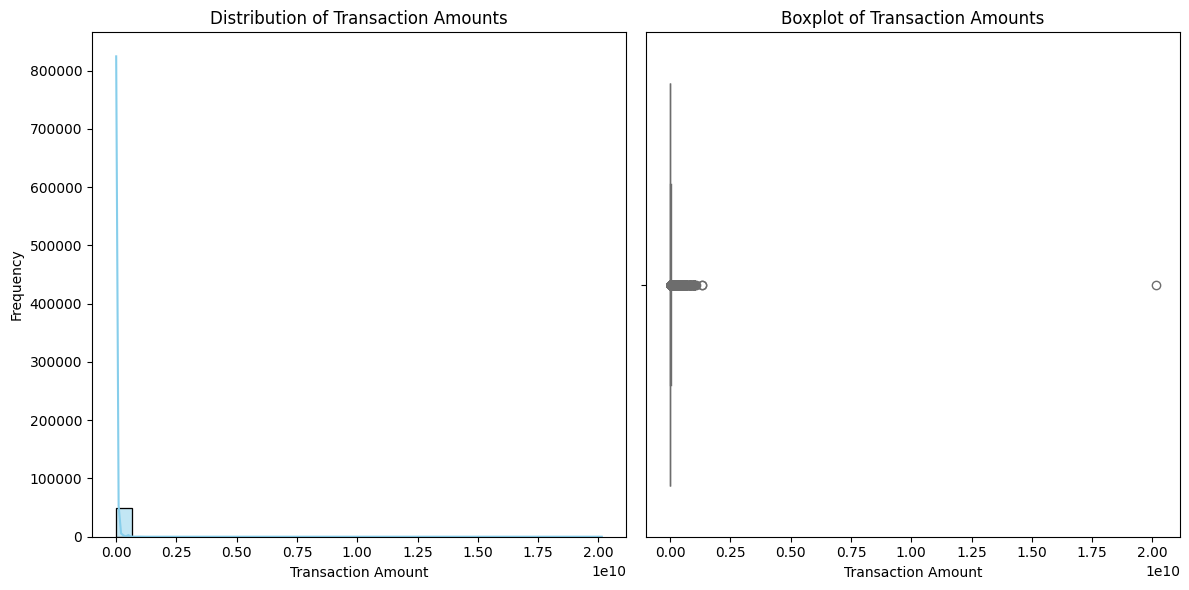

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# ==============================
# 1. Repeated Transactions
# ==============================

# Menggabungkan buyer_id dan seller_id untuk membuat pasangan unik
df1['buyer_seller_pair'] = df1['buyer_id'].astype(str) + ' -> ' + df1['seller_id'].astype(str)

# Menghitung jumlah transaksi untuk setiap pasangan
pair_transaction_counts = df1['buyer_seller_pair'].value_counts().reset_index()
pair_transaction_counts.columns = ['buyer_seller_pair', 'transaction_count']

# Menampilkan pasangan dengan transaksi tertinggi
print("Top 10 Repeated Transactions:")
print(pair_transaction_counts.head(10))

# Visualisasi pasangan dengan transaksi berulang tertinggi
top_n_repeated = 10
top_repeated_pairs = pair_transaction_counts.head(top_n_repeated)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='transaction_count',
    y='buyer_seller_pair',
    data=top_repeated_pairs,
    palette='viridis'
)
plt.title(f"Top {top_n_repeated} Buyer-Seller Pairs by Repeated Transactions")
plt.xlabel("Transaction Count")
plt.ylabel("Buyer-Seller Pair")
plt.tight_layout()
plt.show()

# ==============================
# 2. Abnormally High Transaction Values
# ==============================

# Statistik deskriptif untuk transaction_amount
print("\nDescriptive Statistics for Transaction Amounts:")
print(df1['transaction_amount'].describe())

# Menggunakan IQR untuk mendeteksi transaksi dengan nilai sangat tinggi
Q1 = df1['transaction_amount'].quantile(0.25)
Q3 = df1['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Menyaring transaksi yang abnormally high
high_transactions = df1[df1['transaction_amount'] > upper_bound]

print("\nNumber of Abnormally High Transactions:", len(high_transactions))
print("\nAbnormally High Transactions:")
print(high_transactions[['transaction_amount', 'buyer_id', 'seller_id']].head(10))

# Visualisasi distribusi nilai transaksi
plt.figure(figsize=(12, 6))

# Histogram untuk semua nilai transaksi
plt.subplot(1, 2, 1)
sns.histplot(df1['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Boxplot untuk mendeteksi nilai tinggi
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['transaction_amount'], color='salmon')
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Transaction Amount")

plt.tight_layout()
plt.show()
